# Data Discovery

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Data Understanding

In [2]:
# Set month
month = 'Oktober'

# Set index
imonth = '10'

https://opentransportdata.swiss/de/dataset/istdaten

In [3]:
# Clean data contains every "stop" for a month for all swiss railways
data_all = pd.read_pickle('data/istdaten/{}/data_total_2019{}.pkl'.format(month, imonth))

In [4]:
# Look at data integrity and size
data_all.count()

BETRIEBSTAG            4743322
FAHRT_BEZEICHNER       4743322
BETREIBER_ABK          4743322
PRODUKT_ID             4743322
LINIEN_ID              4743322
LINIEN_TEXT            4743313
VERKEHRSMITTEL_TEXT    4743313
ZUSATZFAHRT_TF         4743322
FAELLT_AUS_TF          4743322
BPUIC                  4743322
HALTESTELLEN_NAME      4743322
ANKUNFTSZEIT           4309819
AN_PROGNOSE            3692030
AN_PROGNOSE_STATUS     4743322
ABFAHRTSZEIT           4309554
AB_PROGNOSE            3694303
AB_PROGNOSE_STATUS     4743322
DURCHFAHRT_TF          4743322
dtype: int64

In [5]:
# Produkt_ID seems to be containing information about the type of public transport
data_all['PRODUKT_ID'].value_counts()

Zug    4743322
Name: PRODUKT_ID, dtype: int64

In [6]:
data_all.head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,01.10.2019,80:06____:17004:000,DB,Zug,17004,RE,RE,False,False,8500090,Basel Bad Bf,NaN,NaN,PROGNOSE,01.10.2019 05:42,NaN,UNBEKANNT,False
1,01.10.2019,80:06____:17012:000,DB,Zug,17012,RE,RE,False,False,8500090,Basel Bad Bf,NaN,NaN,PROGNOSE,01.10.2019 06:34,NaN,UNBEKANNT,False
2,01.10.2019,80:06____:17013:000,DB,Zug,17013,RE,RE,False,False,8500090,Basel Bad Bf,01.10.2019 06:25,NaN,UNBEKANNT,NaN,NaN,PROGNOSE,False
3,01.10.2019,80:06____:17014:000,DB,Zug,17014,RE,RE,False,False,8500090,Basel Bad Bf,NaN,NaN,PROGNOSE,01.10.2019 09:48,NaN,UNBEKANNT,False
4,01.10.2019,80:06____:17015:000,DB,Zug,17015,RE,RE,False,False,8500090,Basel Bad Bf,01.10.2019 08:06,NaN,UNBEKANNT,NaN,NaN,PROGNOSE,False


In [7]:
data_all['LINIEN_ID'].unique().shape

(21980,)

In [10]:
def plot_value_counts_pie_chart(df_col, title_upperpart):
    """
    function takes a column of a dataframe as input and makes a pie chart out of it,
    based on the value_counts function. title_upperpart is also provided to give the 
    plto a title
    """
    plt.figure()
    df_size = len(df_col)
    print(df_size)
    y=df_col.value_counts().values
    for item in y:
        print(item/df_size)
    df_col.value_counts().plot(
        kind='pie',
        explode=explode,
        y=df_col.value_counts().values,
        legend=False,
        autopct='%1.1f%%',
        startangle=0,
        shadow=False,
        label='',
        title=title_upperpart + ', \n total: ' + str(df_size) +
        ' stops (Oktober 2019)',
        figsize=(10, 10))

4743322
1.0


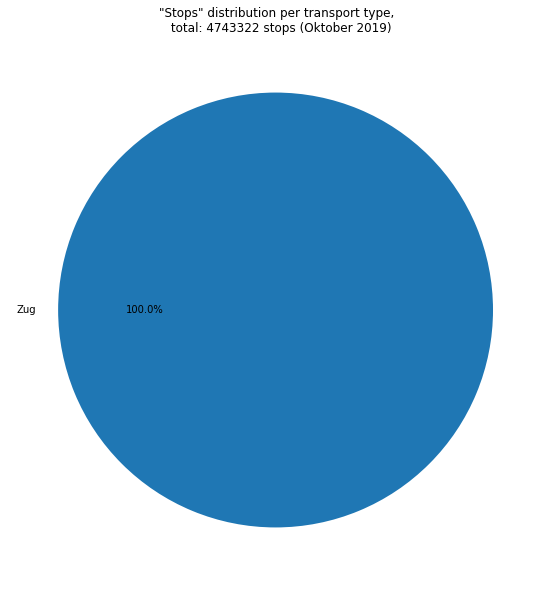

In [11]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_all['PRODUKT_ID'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_all['PRODUKT_ID'],
                            '"Stops" distribution per transport type')

In [12]:
# Keep only trains data (Zug is train in german)
data_train = data_all[data_all['PRODUKT_ID'] == 'Zug']

In [13]:
pd.unique(data_train['BETREIBER_ABK'])

array(['DB', 'DB Regio', 'NeTS-DB', 'SBB', 'NeTS-ÖBB', 'TN', 'BRB', 'JB',
       'MG', 'MVR-mtgn', 'KWO-mib', 'PB', 'RB', 'BOB-spb', 'WAB', 'AB-ab',
       'TPC-al', 'TPC-aomc', 'TPC-asd', 'MBC', 'AVA-bd', 'BLM', 'BLS-bls',
       'BOB', 'SBB GmbH', 'ASM-bti', 'TPC-bvb', 'MVR-cev', 'CJ',
       'TRN-cmn', 'FB', 'FLP', 'MGB-fo', 'FART', 'FW', 'TPF', 'ASM-rvo',
       'TMR-mc', 'MOB', 'THURBO', 'NStCM', 'TRAVYS-oc', 'TRAVYS-pbr',
       'RhB', 'RA', 'SZU', 'ASM-snb', 'SOB-sob', 'ZB', 'RBS', 'MGB-bvz',
       'BLT-wb', 'AVA-wsb', 'TRAVYS-ysc', 'SNCF', 'DFB', 'BC-cmBC',
       'VDBB', 'DVZO', 'LEB', 'TR'], dtype=object)

4743322
0.4051137578262661
0.09803783087043216
0.08689943461565544
0.03245742119130854
0.031731769422358426
0.02820786781922037
0.025859513648873088
0.02530125511192367
0.018516137002716662
0.016646982852945677
0.015959700817275317
0.014103828498255021
0.013597432348046369
0.0126563197691407
0.011625818361055817
0.01144240260307017
0.010820897253022248
0.009218855477237262
0.00876811652255529
0.008512388574927024
0.008178656224477276
0.007890250756748119
0.007520467722832226
0.007408942509068539
0.00667232795918135
0.0064794251792309274
0.0064574996173567805
0.006100787591481245
0.004926083449531784
0.0045879238221651405
0.00452235795925303
0.0041700732102943885
0.003881246097144575
0.0037121662834612534
0.003662622946534096
0.003650606052045381
0.0030995154872471235
0.0030320522199420575
0.0029080884662689988
0.002669226335467
0.002416449905783331
0.0020622677524317345
0.0018286761893879437
0.0010486321611731188
0.0007606483388646185
0.0007178513286679673
0.00061518066873807
0.0005300

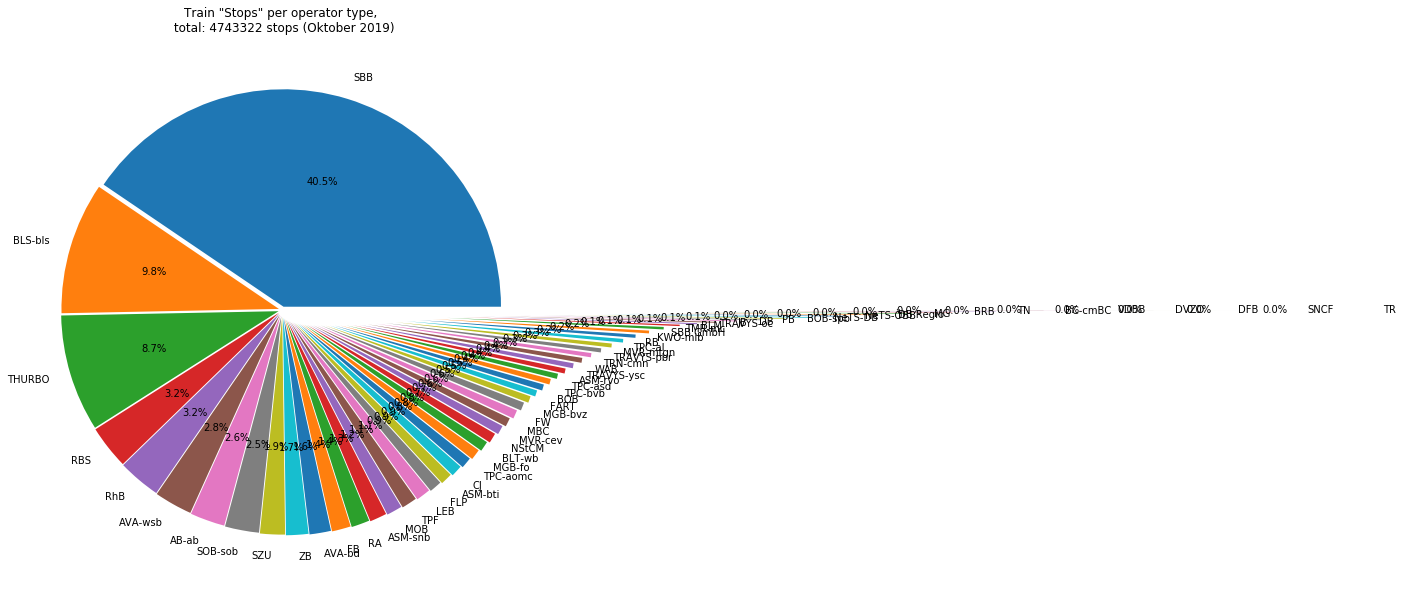

In [14]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_train['BETREIBER_ABK'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_train['BETREIBER_ABK'],
                            'Train "Stops" per operator type')

In [15]:
# Keep only trains operated by SBB
data_train_SBB = data_train[data_train['BETREIBER_ABK'] == 'RBS']

153956
0.742829120008314
0.2571708799916859


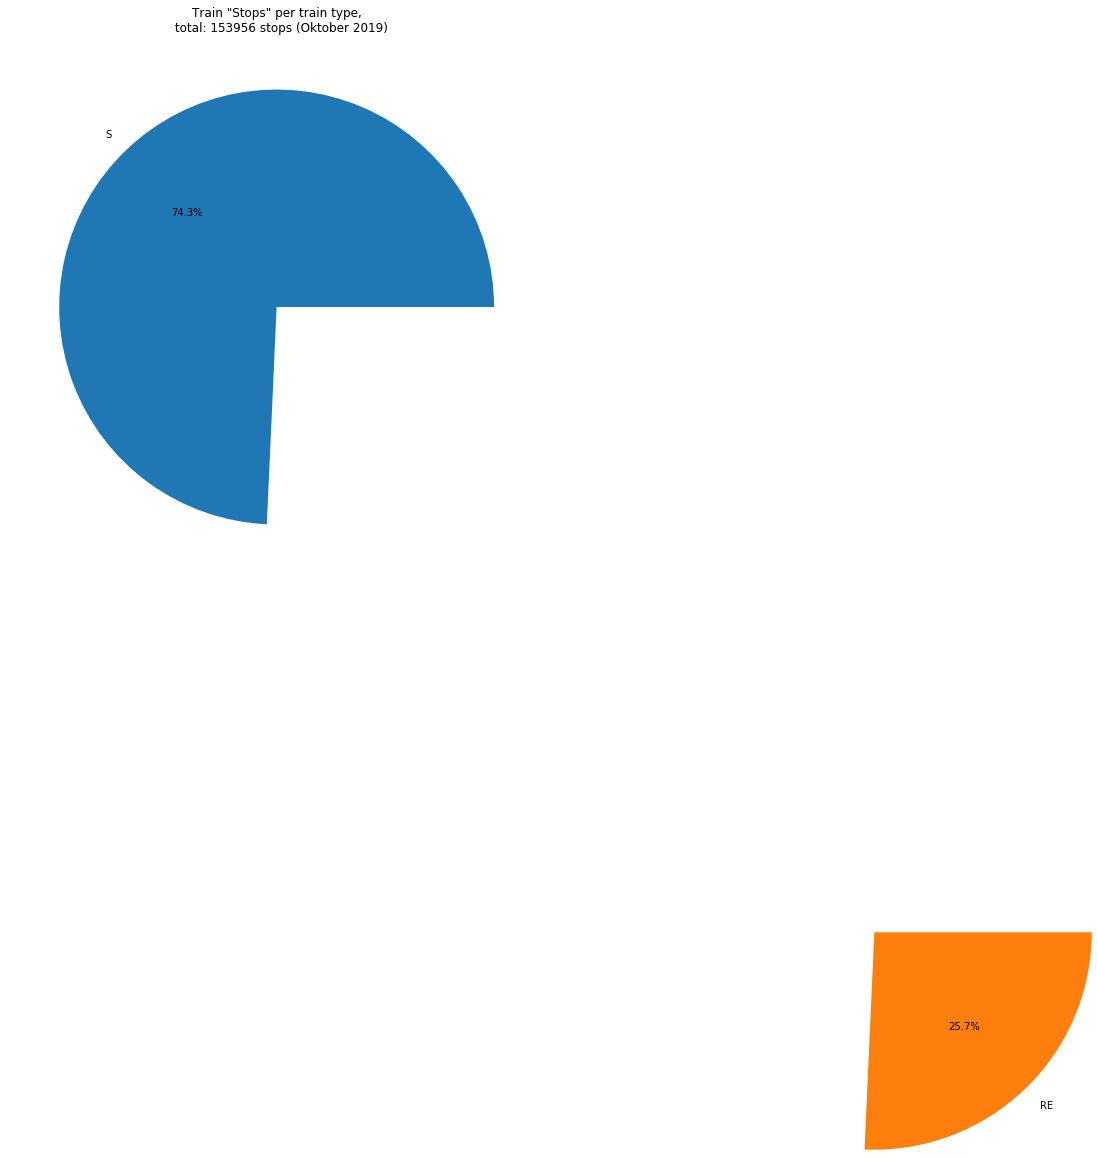

In [16]:
explode = list(
    np.true_divide(
        np.logspace(-1.2, 1.2, data_train_SBB['VERKEHRSMITTEL_TEXT'].value_counts().shape[0]), 4))
plot_value_counts_pie_chart(data_train_SBB['VERKEHRSMITTEL_TEXT'],
                            'Train "Stops" per train type')

In [17]:
# Take a look at the data, to understand its size
data_train_SBB.describe(include='object')

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS
count,153956,153956,153956,153956,153956,153956,153956,153956,134487,134270,153956,134487,134266,153956
unique,31,767,1,1,767,5,2,30,35231,129845,2,35094,129406,2
top,30.10.2019,85:88:1052:000,RBS,Zug,1052,S7,S,Bern,30.10.2019 07:54,18.10.2019 10:47:30,REAL,11.10.2019 18:22,18.10.2019 09:48:00,REAL
freq,5584,364,153956,153956,364,54187,114363,16792,9,5,132857,8,6,132983


In [18]:
# Example of a route
data_train_SBB.loc[data_train_SBB['FAHRT_BEZEICHNER'] == '85:88:8230:000'].head()

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ABK,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,VERKEHRSMITTEL_TEXT,ZUSATZFAHRT_TF,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
1330859,01.10.2019,85:88:8230:000,RBS,Zug,8230,S8,S,False,False,8508064,Bätterkinden,NaN,NaN,PROGNOSE,01.10.2019 22:52,01.10.2019 22:52:34,REAL,False
1330860,01.10.2019,85:88:8230:000,RBS,Zug,8230,S8,S,False,False,8508063,Schalunen,01.10.2019 22:54,01.10.2019 22:54:44,REAL,01.10.2019 22:54,01.10.2019 22:54:51,REAL,False
1330861,01.10.2019,85:88:8230:000,RBS,Zug,8230,S8,S,False,False,8508062,Büren zum Hof,01.10.2019 22:56,01.10.2019 22:56:56,REAL,01.10.2019 22:56,01.10.2019 22:57:11,REAL,False
1330862,01.10.2019,85:88:8230:000,RBS,Zug,8230,S8,S,False,False,8508061,Fraubrunnen,01.10.2019 22:58,01.10.2019 22:58:05,REAL,01.10.2019 22:58,01.10.2019 22:58:40,REAL,False
1330863,01.10.2019,85:88:8230:000,RBS,Zug,8230,S8,S,False,False,8508060,Grafenried,01.10.2019 23:00,01.10.2019 22:59:57,REAL,01.10.2019 23:00,01.10.2019 23:00:40,REAL,False
